In [1]:
import numpy as np
import pandas as pd
import wandb
import my28brains.viz as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hyperbolic import Hyperbolic

import os
os.getcwd()

INFO: Using numpy backend


'/Users/adelemyers/code/my28brains'

In [98]:
import pandas as pd 
import wandb
api = wandb.Api()

tag = "2023-10-25"

# Project is specified by <entity/project-name>
runs = api.runs("bioshape-lab/my28brains-my28brains", filters={"tags": tag})

print(f"runs shape {len(runs)}")


# start_date = pd.to_datetime("2023-10-23")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

summary_df = pd.DataFrame.from_dict(
    summary_list)
config_df = pd.DataFrame.from_dict(
    config_list)
name_df = pd.DataFrame.from_dict(
    name_list)

runs_df = pd.concat([summary_df, config_df, name_df], axis = 1)

runs_df.to_csv(f"my28brains/notebooks/csv/project{tag}.csv")

runs shape 4752


In [12]:
df = pd.read_csv("my28brains/notebooks/csv/project2023-10-25.csv")
df = df.dropna(axis=1, how='all')
print(f"number of runs: {len(df['dataset_name'])}")
df.head()

number of runs: 4759


Unnamed: 0  geodesic_coef_err  _step  rmsd_geod  geodesic_intercept_err  \
0           0                NaN    NaN        NaN                     NaN   
1           1           0.069206    3.0   0.175159                0.170872   
2           2           0.014360    4.0   0.043570                0.043004   
3           3           0.879824    3.0   0.679249                0.514656   
4           4           0.477593    3.0   0.432189                0.362288   

   _runtime                                          true_coef  \
0       NaN                                                NaN   
1  8.794644  [0.5054776609671856, 0.6854569994882734, 0.138...   
2  8.875887  [0.30819188498582417, 0.27014702401036017, 0.4...   
3  9.678640  [3.1954475256573662, 1.2659835120415546, 1.058...   
4  9.085212  [2.143691531548964, 1.1211364684305278, 1.1197...   

   n_geod_function_evaluations  \
0                          NaN   
1                        162.0   
2                         98.0   
3                        506.0   
4                        247.0   

                                   gr_geod_residuals  \
0                                                NaN   
1  [0.08749708542602673, 0.08672420032476016, 0.0...   
2  [0.02794950703182997, 0.027485737330062474, 0....   
3  [0.20303549075404756, 0.2011290968234581, 0.19...   
4  [0.15717864415269414, 0.15535796837914673, 0.1...   

   n_geod_jacobian_evaluations  ... full_run tol_factor dataset_name  \
0                          NaN  ...      NaN        NaN          NaN   
1                         18.0  ...     True      0.001  hyperboloid   
2                         14.0  ...     True      0.001  hyperboloid   
3                         22.0  ...     True      0.001  hyperboloid   
4                         19.0  ...     True      0.001  hyperboloid   

  linear_noise.1 noise_factor.1 space_dimension  linear_residuals  \
0            NaN            NaN             NaN               NaN   
1          False          0.001             3.0             False   
2          False          0.001             2.0             False   
3          False          0.001            10.0             False   
4          False          0.001             5.0             False   

   project_linear_noise  geodesic_initialization.1                      0  
0                   NaN                        NaN  faithful-monkey-14522  
1                 False                 warm_start           run_ap7mx44i  
2                 False                 warm_start           run_7j9vwle7  
3                  True                 warm_start           run_s291cfly  
4                  True                 warm_start           run_cbr157ge  

[5 rows x 38 columns]

# Add/delete columns to df

In [13]:
df["linear_residuals_colors"] = df["linear_residuals"]*1
df["linear_noise_colors"] = df["linear_noise"]*1
print(df.columns)

Index(['Unnamed: 0', 'geodesic_coef_err', '_step', 'rmsd_geod',
       'geodesic_intercept_err', '_runtime', 'true_coef',
       'n_geod_function_evaluations', 'gr_geod_residuals',
       'n_geod_jacobian_evaluations', 'y_pred_for_gr',
       'gr_geod_residuals_hist', 'linear_noise', 'gr_linear_residuals',
       'geodesic_initialization', 'y_noiseless', 'geodesic_tol', 'nrmsd_geod',
       'geodesic_duration_time', '_timestamp', '_wandb', 'n_geod_iterations',
       'true_intercept', 'y', 'gr_linear_residuals_hist', 'noise_factor',
       'line vs geodesic', 'n_X', 'full_run', 'tol_factor', 'dataset_name',
       'linear_noise.1', 'noise_factor.1', 'space_dimension',
       'linear_residuals', 'project_linear_noise', 'geodesic_initialization.1',
       '0', 'linear_residuals_colors', 'linear_noise_colors'],
      dtype='object')


# Parameters to fix

In [14]:
dataset_name = "hypersphere"
n_X = 30
dim1 = 2
dim2 = 3
dim3 = 5
dim4 = 10
# noise_type = "geodesic"
project_linear_noise = True

df_space = df[df["dataset_name"] == dataset_name]
print(df_space.columns)

df_space = df_space[df_space["project_linear_noise"]==project_linear_noise]



df1 = df_space[df_space["space_dimension"] == dim1]
df2 = df_space[df_space["space_dimension"] == dim2]
df3 = df_space[df_space["space_dimension"] == dim3]
df4 = df_space[df_space["space_dimension"] == dim4]
dfs = [df1, df2, df3, df4]

# df1 = df1[df1["linear_noise"] == (noise_type == "linear")]

Index(['Unnamed: 0', 'geodesic_coef_err', '_step', 'rmsd_geod',
       'geodesic_intercept_err', '_runtime', 'true_coef',
       'n_geod_function_evaluations', 'gr_geod_residuals',
       'n_geod_jacobian_evaluations', 'y_pred_for_gr',
       'gr_geod_residuals_hist', 'linear_noise', 'gr_linear_residuals',
       'geodesic_initialization', 'y_noiseless', 'geodesic_tol', 'nrmsd_geod',
       'geodesic_duration_time', '_timestamp', '_wandb', 'n_geod_iterations',
       'true_intercept', 'y', 'gr_linear_residuals_hist', 'noise_factor',
       'line vs geodesic', 'n_X', 'full_run', 'tol_factor', 'dataset_name',
       'linear_noise.1', 'noise_factor.1', 'space_dimension',
       'linear_residuals', 'project_linear_noise', 'geodesic_initialization.1',
       '0', 'linear_residuals_colors', 'linear_noise_colors'],
      dtype='object')


# Paper Figs

1. RMSD linear as a function of noise level

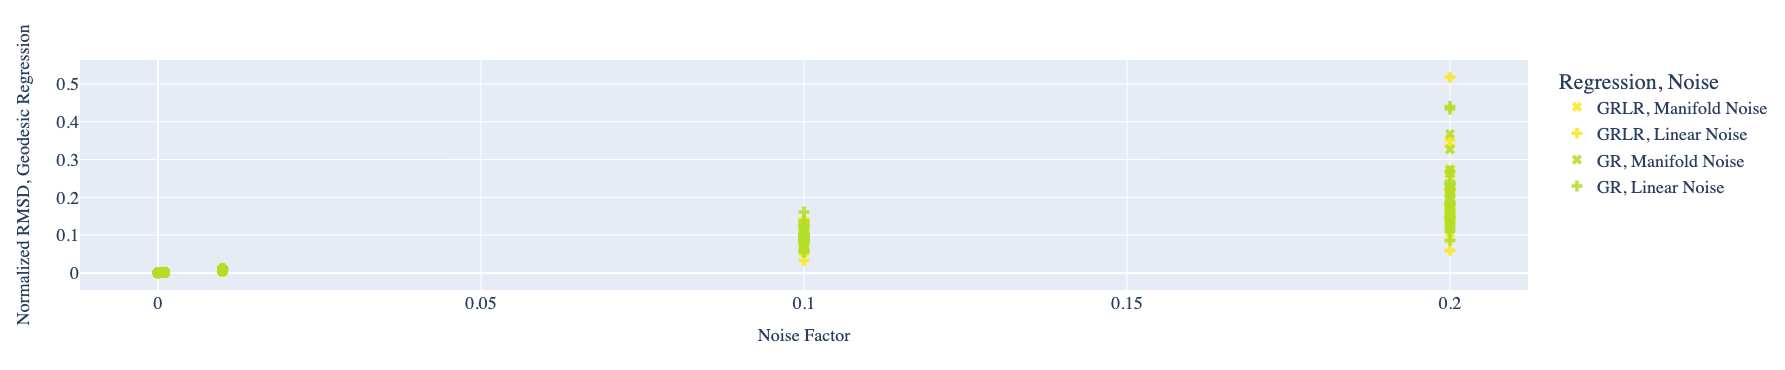

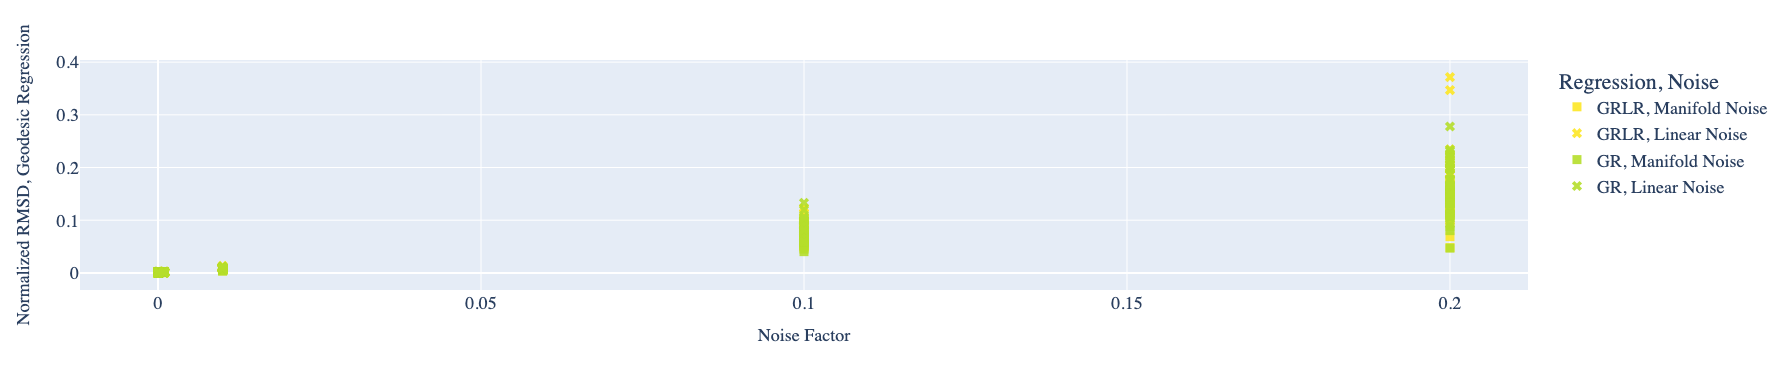

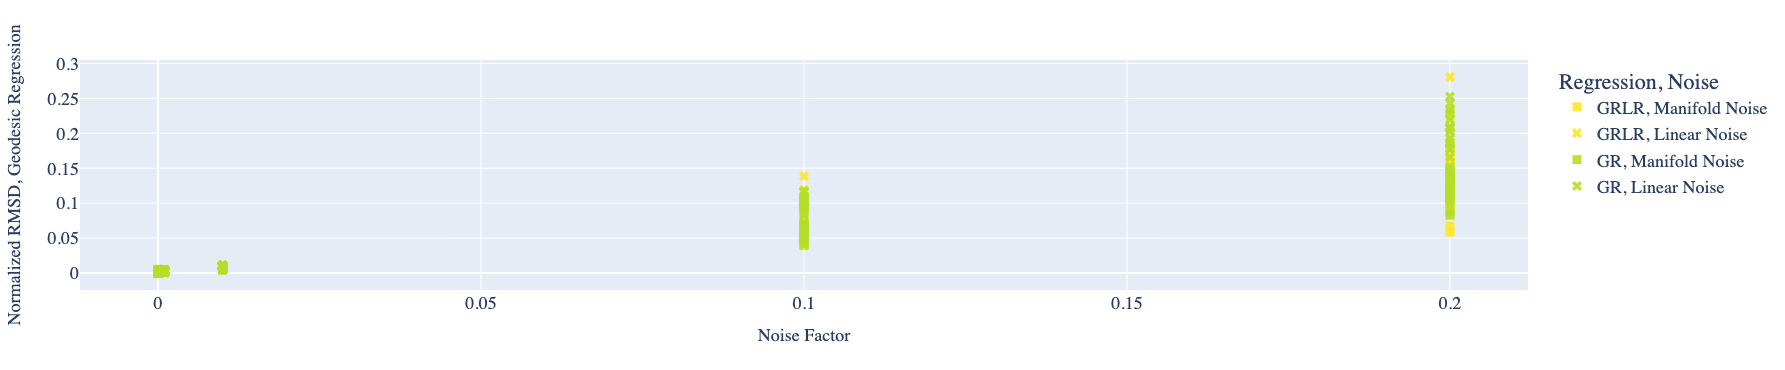

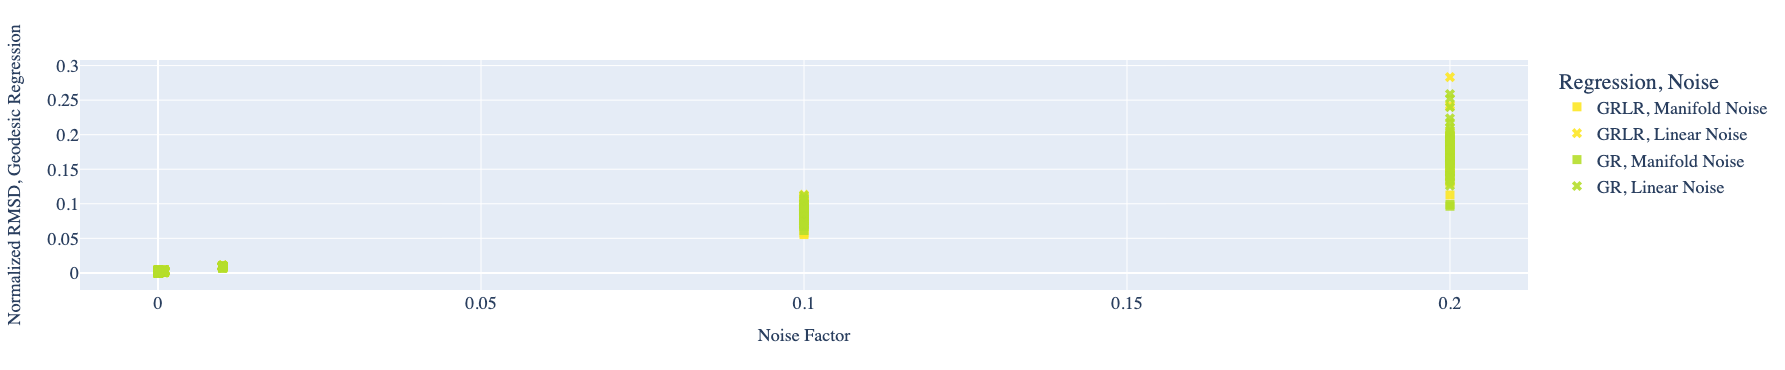

In [5]:
for df in dfs:
    fig = viz.scatterplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="linear_noise",
        x_label= "noise_factor",   #"geodesic_duration_time",
        y_label="nrmsd_geod",
    )

3. RMSD geodesic as a function of noise level (same plot as above, but we want to record the geodesic formulation of the RMSD)

4. Number of iterations as a function of the sample size n_X

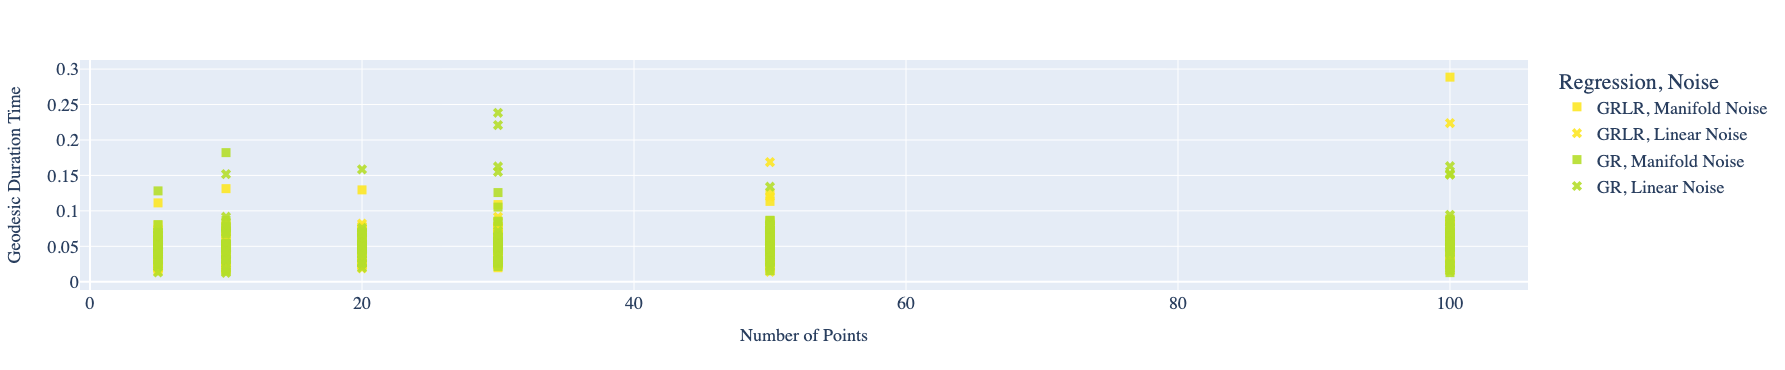

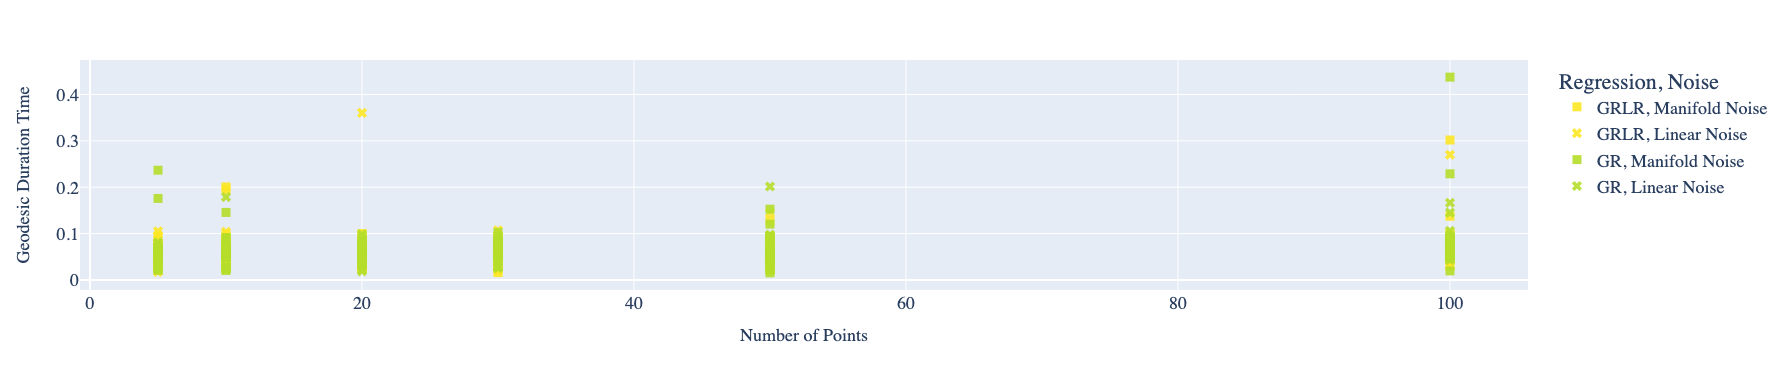

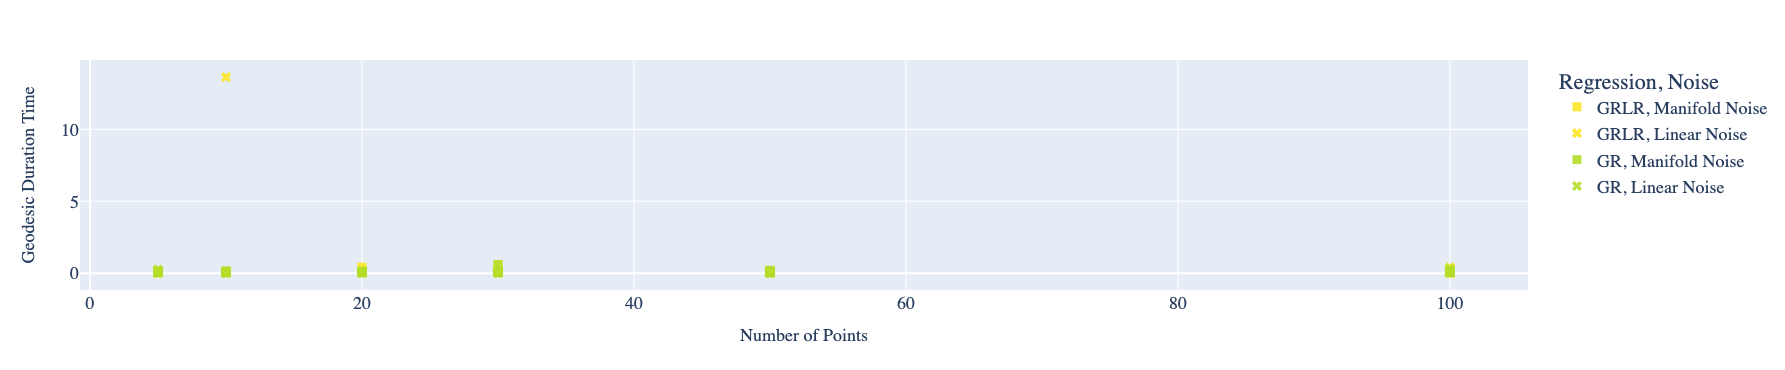

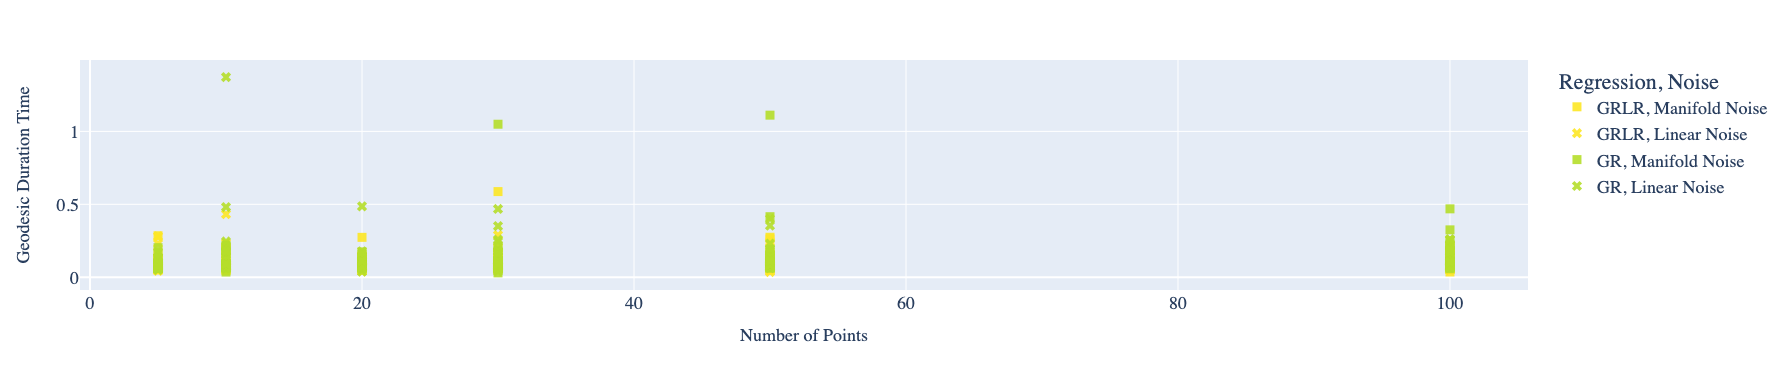

In [17]:
for df in dfs:
    fig = viz.scatterplot_evaluation(
        df= df,
        colored_by="linear_residuals",
        marked_by="linear_noise",
        x_label= "n_X",
        y_label="geodesic_duration_time",   #"n_geod_function_evaluations",
    )

# Meeting with Nina: plots from white board

1. Visualization of one training --> Go to notebook 10

In [15]:
dim = 2
n_X = 30
space = Hyperbolic(dim=dim, default_coords_type="extrinsic")

In [16]:
true_sequence = space.metric.geodesic()

TypeError: Connection.geodesic() missing 1 required positional argument: 'initial_point'

In [ ]:
viz.benchmark_data_sequence(space=space, sequence_1=true_sequence, sequence_2 = , sequence_3 = )

4a.hyperboloid

4b.hypersphere

## New viz function

In [117]:
df5 = df5[df5["noise_factor"] == noise_factor]

fig = viz.scatterplot_evaluation(
    df= df5,
    colored_by="linear_residuals",
    marked_by="linear_noise",
    x_label= "n_geod_function_evaluations",   #"geodesic_duration_time",
    y_label="nrmsd_geod",
)

KeyError: 'n_geod_function_evaluations'

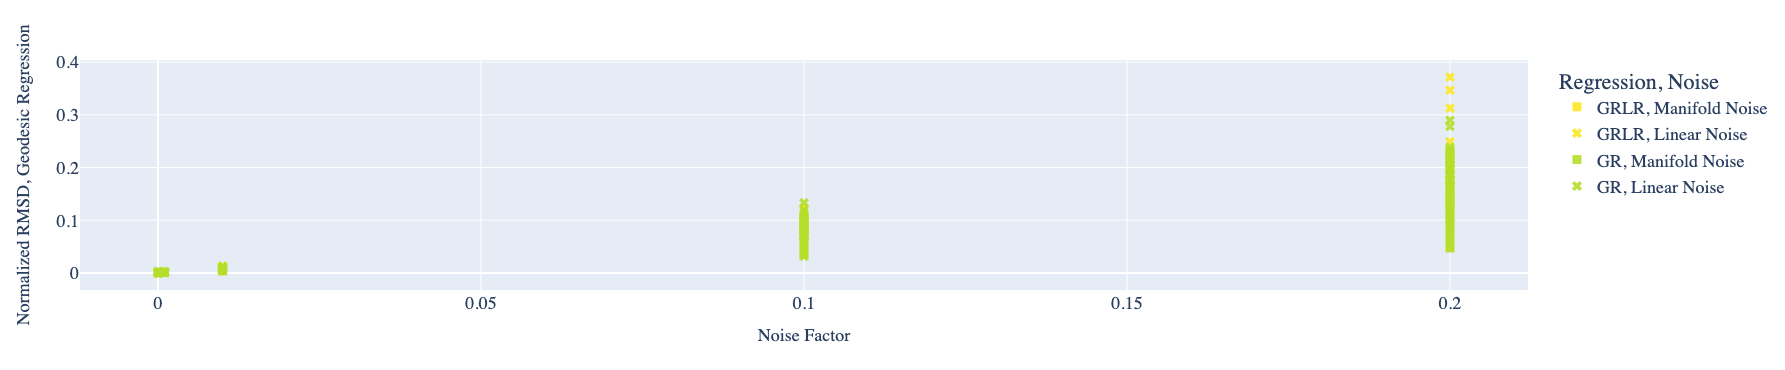

In [104]:
fig = viz.scatterplot_evaluation(
    df= df5,
    colored_by="linear_residuals",
    marked_by="linear_noise",
    x_label="noise_factor",
    y_label="nrmsd_geod",
)